In [17]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np


# load and clean data


In [ ]:
fname = './data/heartrate-2018-07-31T23:32:51.csv'
raw_data = np.genfromtxt(fname, delimiter=',')
# filter out spurious noise < 0
# data range is 0-1024 (because the A/D is 10 bit, 2**10 == 1024)
data = data[data[:,1] > 0,:]



# plot raw data

<IPython.core.display.Javascript object>


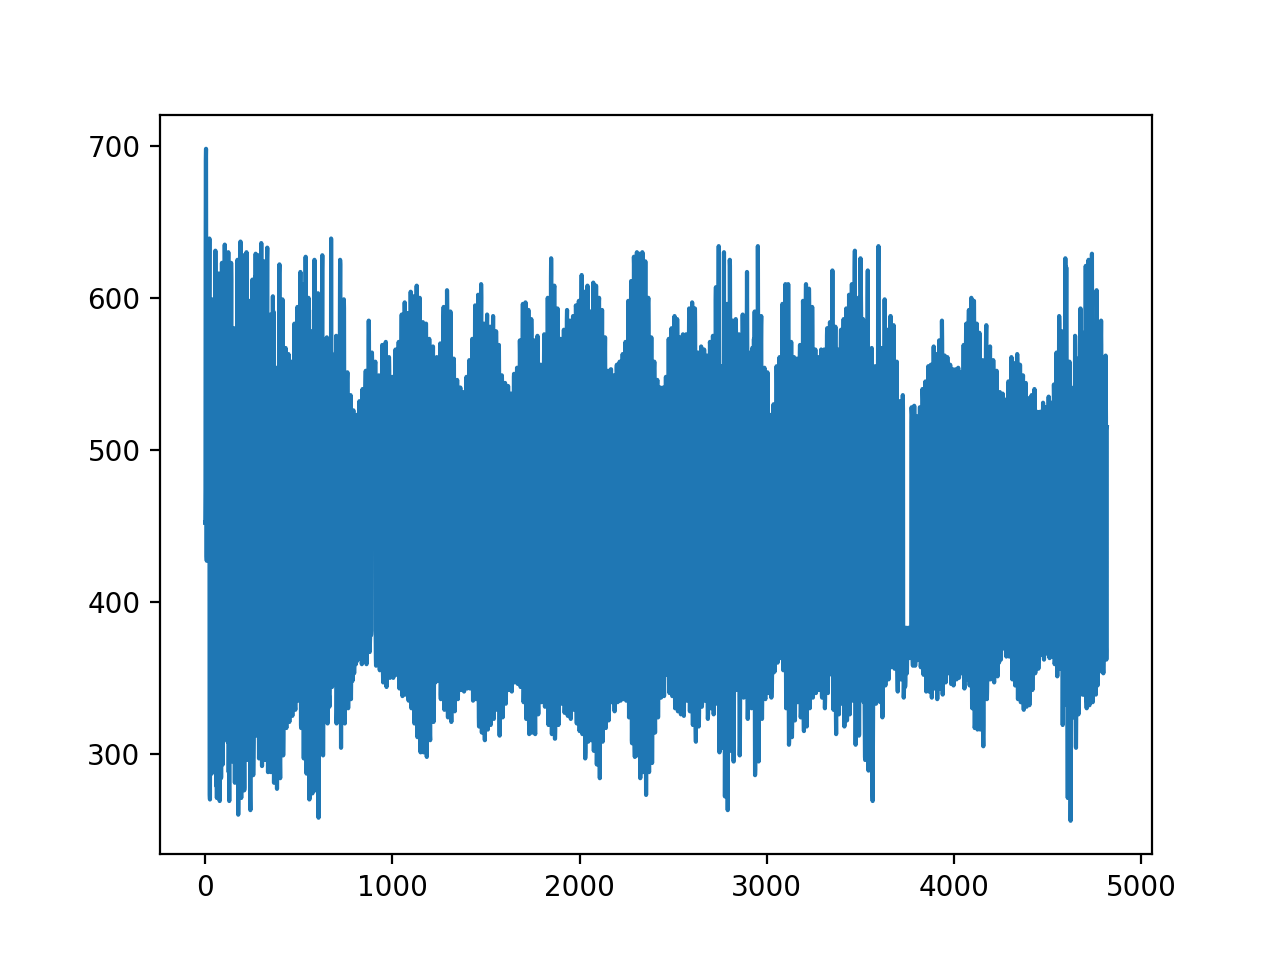

array([1.53310517e+09, 1.53310517e+09, 1.53310517e+09, ...,
       1.53310534e+09, 1.53310534e+09, 1.53310534e+09])

In [20]:
plt.figure()
plt.plot(filtered[:,1])
my_data[:,0]